In [1]:
import numpy as np
import pandas as pd
import astropy.io.fits as fits
import os
import sys
import glob

%matplotlib inline
import matplotlib.pyplot as plt

Read the fits event file

In [2]:
hdul = fits.open("scorefile_20kev.fits")
hdul.info()

events = hdul[1].data
print(events.columns)

t_ID = events['EventID']
t_ED = events['En_dep']
t_SI = events['Scint_ID']
t_XP = events['X_Primary']
t_YP = events['Y_Primary']
t_ZP = events['Z_Primary']
t_TP = events['Theta_Primary']
t_PP = events['Phi_Primary']
t_EP = events['En_Primary']
t_Dx = events['X_Detected']
t_Dy = events['Y_Detected']
t_Dz = events['Z_Detected']

Filename: scorefile_20kev.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EVENTS        1 BinTableHDU     49   178363R x 15C   [1K, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
ColDefs(
    name = 'EventID'; format = '1K'
    name = 'En_dep'; format = '1D'; unit = 'keV'
    name = 'Scint_ID'; format = '1K'
    name = 'X_Detected'; format = '1D'; unit = 'cm'
    name = 'Y_Detected'; format = '1D'; unit = 'cm'
    name = 'Z_Detected'; format = '1D'; unit = 'cm'
    name = 'X_Primary'; format = '1D'; unit = 'cm'
    name = 'Y_Primary'; format = '1D'; unit = 'cm'
    name = 'Z_Primary'; format = '1D'; unit = 'cm'
    name = 'Theta_Primary'; format = '1D'; unit = 'degree'
    name = 'Phi_Primary'; format = '1D'; unit = 'degree'
    name = 'En_Primary'; format = '1D'; unit = 'keV'
    name = 'X_Pol'; format = '1D'
    name = 'Y_Pol'; format = '1D'
    name = 'Z_Pol'; format = '1D'
)


Create a pandas data frame

In [3]:
data = {'EventID': t_ID, 'En_dep': t_ED, 'Scint_ID': t_SI, 'X_Primary': t_XP, 'Y_Primary': t_YP, 'Z_Primary': t_ZP,
        'Theta_Primary': t_TP, 'Phi_Primary': t_PP, 'En_Primary': t_EP, 'X_Detected': t_Dx,
       'Y_Detected': t_Dy, 'Z_Detected': t_Dz}
df = pd.DataFrame(data)

In [4]:
df

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
0,11,1.197140,100,-0.102996,0.100238,-1.0,180.0,0.0,20.0,-1.158308,0.995162,2.838767
1,12,1.116448,100,-0.098368,0.106899,-1.0,180.0,0.0,20.0,-1.158308,0.995162,2.838767
2,23,19.973460,100,-0.106059,0.094393,-1.0,180.0,0.0,20.0,-1.158308,0.995162,2.838767
3,24,19.964880,100,-0.094556,0.109814,-1.0,180.0,0.0,20.0,-1.158308,0.995162,2.838767
4,31,1.364392,100,-0.104935,0.090978,-1.0,180.0,0.0,20.0,-1.158308,0.995162,2.838767
...,...,...,...,...,...,...,...,...,...,...,...,...
178358,999965,19.964880,100,-0.090883,0.104529,-1.0,180.0,0.0,20.0,-1.158308,0.995162,2.838767
178359,999971,0.075930,100,-0.106696,0.095950,-1.0,180.0,0.0,20.0,-1.158308,0.995162,2.838767
178360,999972,19.973450,100,-0.101759,0.109797,-1.0,180.0,0.0,20.0,-1.158308,0.995162,2.838767
178361,999980,19.982040,100,-0.095579,0.105181,-1.0,180.0,0.0,20.0,-1.158308,0.995162,2.838767


In [5]:
# Event with Scint_ID = 100 (scatterer)
scatterer_events = df[df['Scint_ID'] == 100]
print('Total events: {}'.format(len(df)))
print('Scatterer events: {}'.format(len(scatterer_events)))
print('Absorber events: {}'.format(len(df) -  len(scatterer_events)))

Total events: 178363
Scatterer events: 173582
Absorber events: 4781


In [6]:
Scint_ID = []
X_Detected = []
Y_Detected = []
Z_Detected = []

for i in range(32):
    Scint_ID.append(int(df[df['Scint_ID'] == i+1].iloc[0,:]['Scint_ID']))
    X_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['X_Detected'])
    Y_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Y_Detected'])
    Z_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Z_Detected'])
    
print("Number of detected positions: {}".format(len(Scint_ID)))

# create the data frame
data = {'Scint_ID': Scint_ID, 'X_Detected': X_Detected, 'Y_Detected': Y_Detected,
       'Z_Detected': Z_Detected}
look_up_table_absorber = pd.DataFrame(data)

Number of detected positions: 32


In [7]:
Scint_ID = []
X_Detected = []
Y_Detected = []
Z_Detected = []

Scint_ID.append(int(df[df['Scint_ID'] == 100].iloc[0,:]['Scint_ID']))
X_Detected.append(df[df['Scint_ID'] == 100].iloc[0,:]['X_Detected'])
Y_Detected.append(df[df['Scint_ID'] == 100].iloc[0,:]['Y_Detected'])
Z_Detected.append(df[df['Scint_ID'] == 100].iloc[0,:]['Z_Detected'])

# create the data frame
data = {'Scint_ID': Scint_ID, 'X_Detected': X_Detected, 'Y_Detected': Y_Detected,
       'Z_Detected': Z_Detected}
look_up_table_scatterer = pd.DataFrame(data)

look_up_table_scatterer

,Scint_ID,X_Detected,Y_Detected,Z_Detected
0,100,-1.158308,0.995162,2.838767


Plot the detectors position

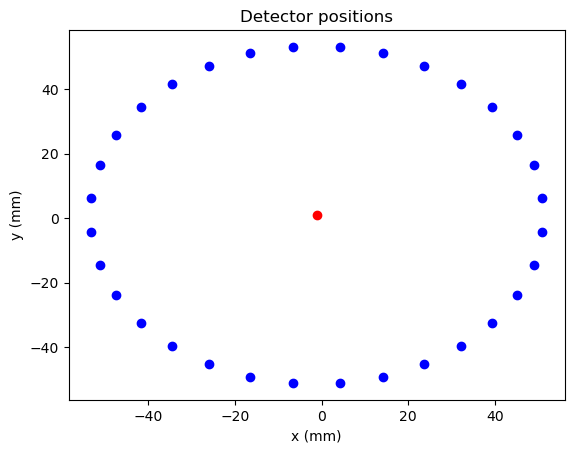

In [8]:
position_x = []
position_y = []
position_z = []
for i in range(len(look_up_table_scatterer)):
    position_x.append(look_up_table_scatterer.iloc[i,1])
    position_y.append(look_up_table_scatterer.iloc[i,2])
    position_z.append(look_up_table_scatterer.iloc[i,3])
plt.plot(position_x, position_y, 'o', color='red');

position_x = []
position_y = []
position_z = []
for i in range(len(look_up_table_absorber)):
    position_x.append(look_up_table_absorber.iloc[i,1])
    position_y.append(look_up_table_absorber.iloc[i,2])
    position_z.append(look_up_table_absorber.iloc[i,3])
plt.plot(position_x, position_y, 'o', color='blue');
    
plt.title('Detector positions')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')    

plt.savefig('positions_detectors_20kev.png')

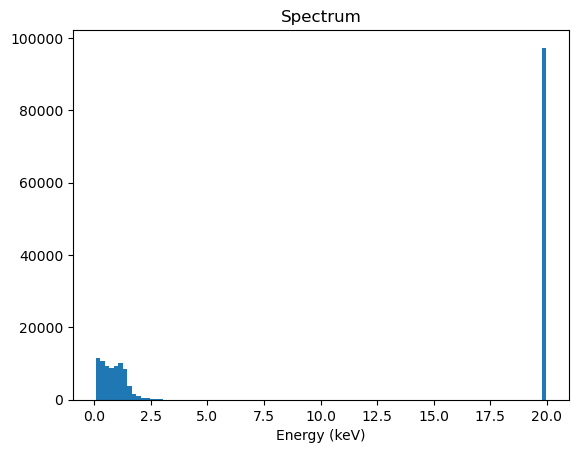

In [9]:
plt.hist(scatterer_events['En_dep'], bins=100);
plt.title('Spectrum');
plt.xlabel('Energy (keV)');

plt.savefig('spec_scatterer_20kev.png')